## Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/Real_Estate.csv'

data = pd.read_csv(filepath)

pd.set_option('display.max_columns', None)
data.head(6)

Mounted at /content/drive


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1


## Eliminate Redundancy

In [3]:
# Rename columns for clarity
data = data.rename(columns={
    "No": "ID",
    "X1 transaction date": "Transaction Date",
    "X2 house age": "House Age",
    "X3 distance to the nearest MRT station": "Distance to MRT",
    "X4 number of convenience stores": "Convenience Stores",
    "X5 latitude": "Latitude",
    "X6 longitude": "Longitude",
    "Y house price of unit area": "Price per Unit Area"
})

# Drop the 'ID' column, as it does not contribute to prediction
data.drop(columns=["ID"], inplace=True)

# Display the cleaned data structure
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction Date     414 non-null    float64
 1   House Age            414 non-null    float64
 2   Distance to MRT      414 non-null    float64
 3   Convenience Stores   414 non-null    int64  
 4   Latitude             414 non-null    float64
 5   Longitude            414 non-null    float64
 6   Price per Unit Area  414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB
   Transaction Date  House Age  Distance to MRT  Convenience Stores  Latitude  \
0          2012.917       32.0         84.87882                  10  24.98298   
1          2012.917       19.5        306.59470                   9  24.98034   
2          2013.583       13.3        561.98450                   5  24.98746   
3          2013.500       13.3        561.98450                   5  24

In [35]:
pd.set_option('display.max_columns', None)
data.head(6)

,Transaction Date,House Age,Distance to MRT,Convenience Stores,Latitude,Longitude,Price per Unit Area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1


Model Train Test split:

In [36]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = data.drop(columns=["Price per Unit Area"])
y = data["Price per Unit Area"]

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (331, 6)
Testing Features Shape: (83, 6)
Training Labels Shape: (331,)
Testing Labels Shape: (83,)


## Linear Regression Modeling:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate R² score (accuracy)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the results
print(f"R² Score (Accuracy): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score (Accuracy): 0.6811
Root Mean Squared Error (RMSE): 7.31


Accuracy is low and RMSE is high

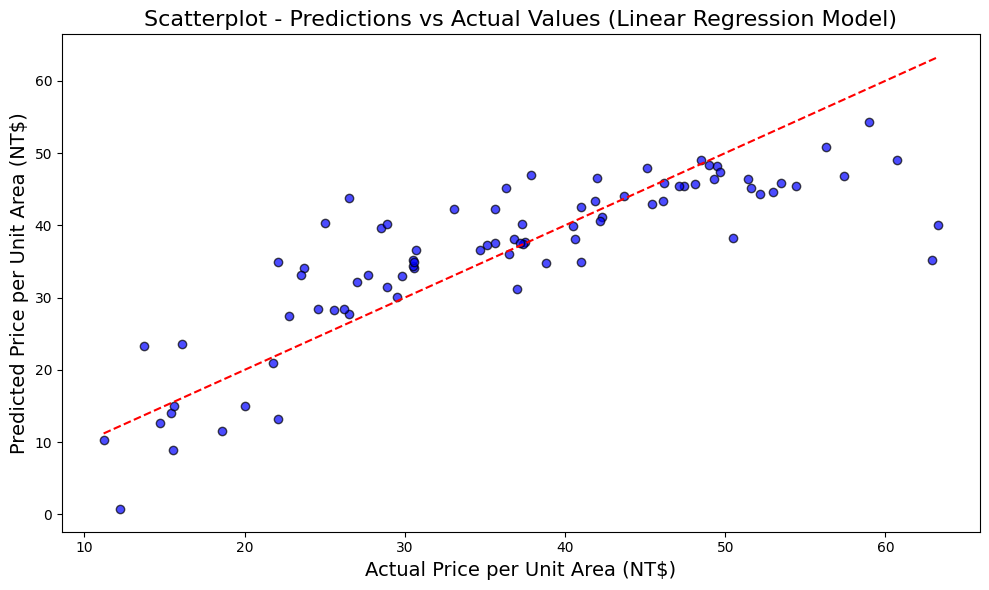

In [31]:
# Plot a scatterplot of predictions vs. actual values for the Linear Regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Scatterplot - Predictions vs Actual Values (Linear Regression Model)", fontsize=16)
plt.xlabel("Actual Price per Unit Area (NT$)", fontsize=14)
plt.ylabel("Predicted Price per Unit Area (NT$)", fontsize=14)
plt.tight_layout()
plt.show()

## Ridge Regression Modeling:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define the Ridge Regression model
ridge_model = Ridge()

# Define a grid of hyperparameter values for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model and its parameters
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Predictions with the best model
y_pred = best_ridge_model.predict(X_test)

# Calculate R² score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"Best Alpha: {best_alpha}")
print(f"R² Score (Accuracy): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Best Alpha: 0.01
R² Score (Accuracy): 0.6818
Root Mean Squared Error (RMSE): 7.31


Ridge regression did not greatly improve the model

## Decision Tree Model:

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate R² score and RMSE for the Decision Tree Regressor
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Display the results
print(f"R² Score (Accuracy): {r2_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")


R² Score (Accuracy): 0.6038
Root Mean Squared Error (RMSE): 8.15


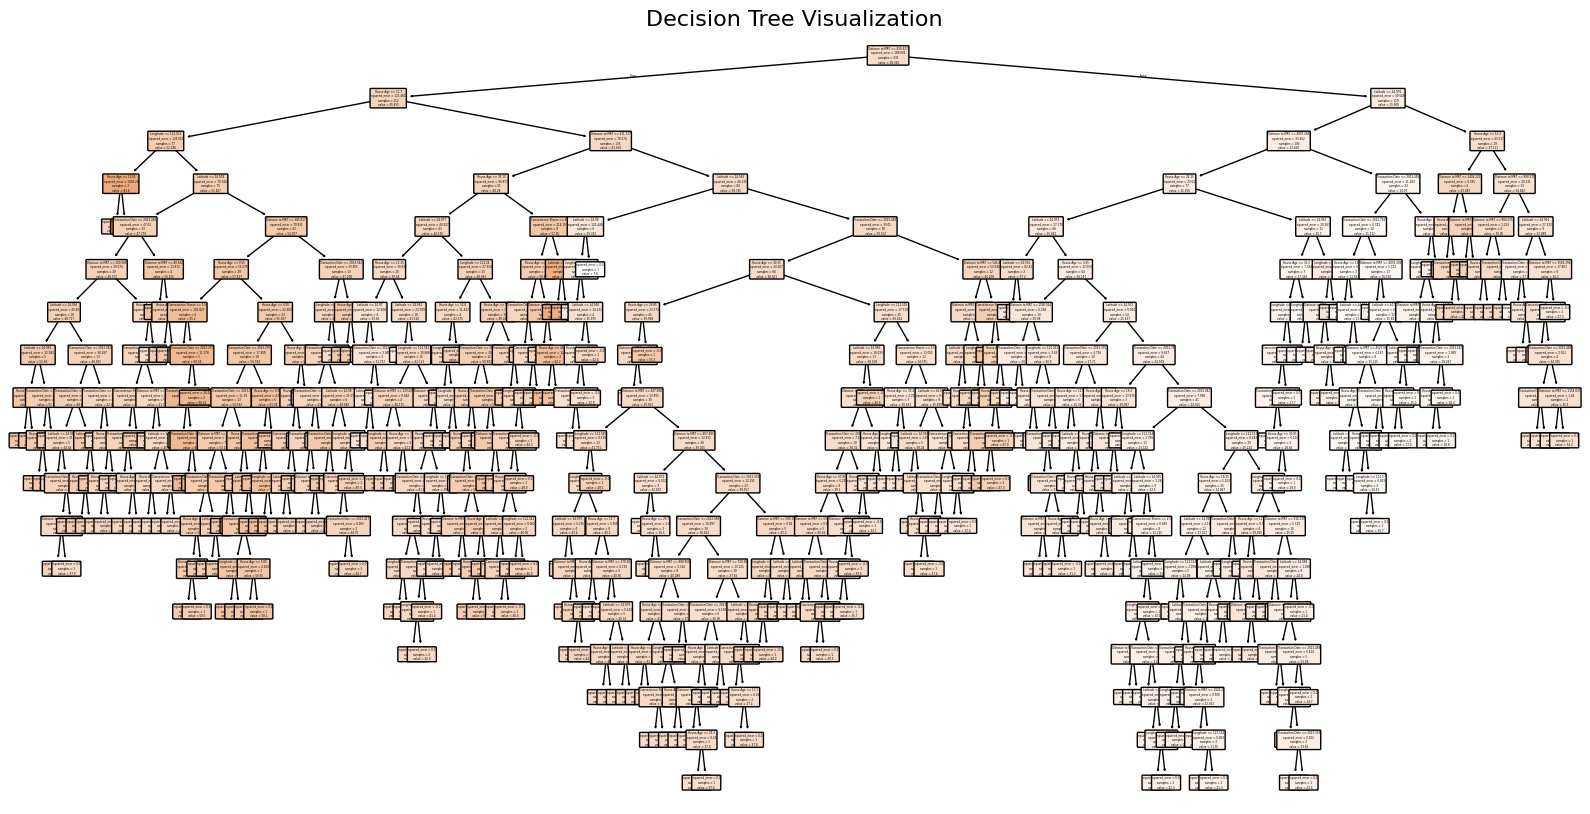

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set up the figure for plotting
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=2
)

# Display the plot
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


Adjust max depth to prevent overfitting

In [46]:
# Initialize the Decision Tree Regressor with a limited max depth
dt_model_limited = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model using the training data
dt_model_limited.fit(X_train, y_train)

# Predict on the test data
y_pred_limited = dt_model_limited.predict(X_test)

# Calculate R² score and RMSE for the Decision Tree with limited max depth
r2_limited = r2_score(y_test, y_pred_limited)
rmse_limited = np.sqrt(mean_squared_error(y_test, y_pred_limited))

# Display results
print(f"R² Score (Accuracy): {r2_limited:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_limited:.2f}")

R² Score (Accuracy): 0.7901
Root Mean Squared Error (RMSE): 5.93


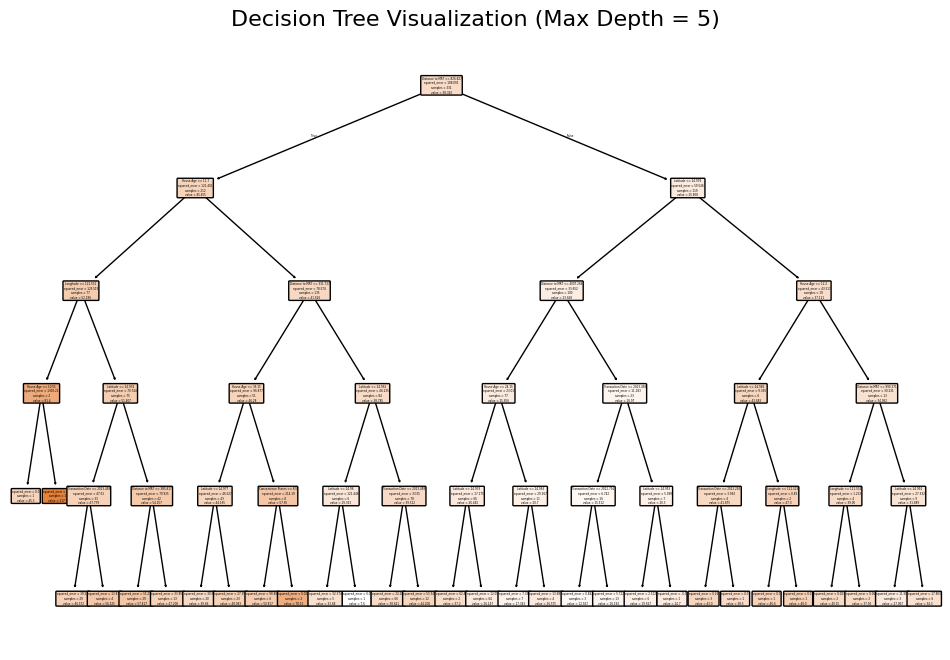

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))

# Plot the decision tree with limited max depth
plot_tree(
    dt_model_limited,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=2
)

# Display the plot
plt.title("Decision Tree Visualization (Max Depth = 5)", fontsize=16)
plt.show()


The optimized max depth returned a higher accuracy score and lower RMSE

## Gradient Boosting Model:

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for 'n_estimators'
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

# Initialize the Gradient Boosting Regressor with default parameters
gb_model = GradientBoostingRegressor(random_state=42, learning_rate=0.1, max_depth=3)

# Perform Grid Search with Cross Validation to optimize 'n_estimators'
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Use the best model from Grid Search
best_gb_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_gb = best_gb_model.predict(X_test)

# Calculate R² score and RMSE for the best Gradient Boosting model
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

# Display results
print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")
print(f"R² Score (Accuracy): {r2_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best n_estimators: 150
R² Score (Accuracy): 0.8057
Root Mean Squared Error (RMSE): 5.71


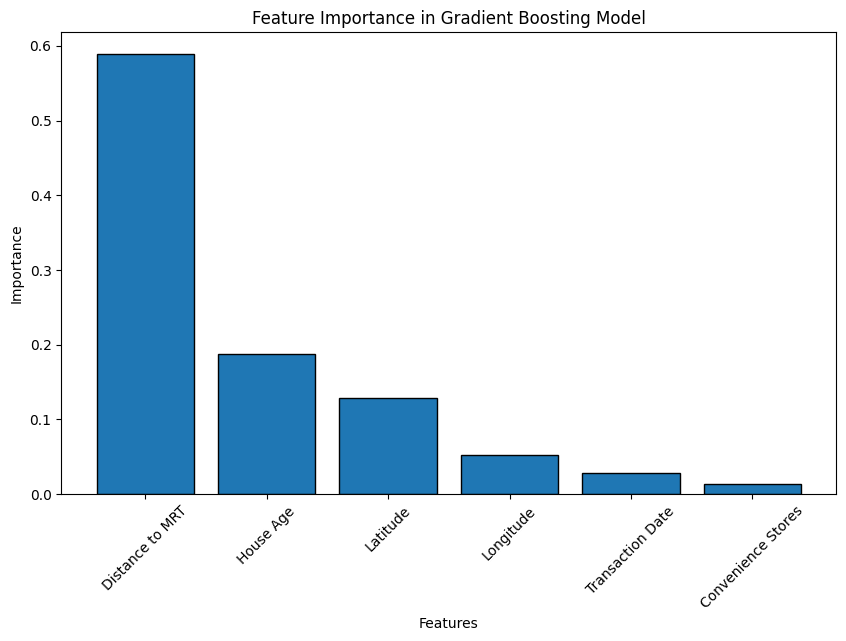

              Feature  Importance
0     Distance to MRT    0.588683
1           House Age    0.187722
2            Latitude    0.128925
3           Longitude    0.052134
4    Transaction Date    0.028666
5  Convenience Stores    0.013871


In [ ]:
# Extract feature importance from the Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], edgecolor='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.xticks(rotation=45)
plt.show()

# Display feature importance values
print(importance_df.reset_index(drop=True))


Gradient Boosting has the highest accuracy and lowest RMSC. Now I will try some feature engineering to improve accuracy with this model

## Extracting Features From Latitude and Longitude:

Using the nearby districts: xinyi, daan, and zhongshan as wealthy business centers with high property value.

In [54]:
# Define the coordinates for Xinyi, Daan, and Zhongshan
xinyi_coords = (25.0409, 121.5720)
daan_coords = (25.0249, 121.5434)
zhongshan_coords = (25.0792, 121.5427)

# Function to calculate the distance between two geographical points
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius_earth_km = 6371  # Earth's radius in kilometers
    return radius_earth_km * c

# Calculate distances for each location
data['Distance from Xinyi'] = data.apply(
    lambda row: haversine(row['Latitude'], row['Longitude'], xinyi_coords[0], xinyi_coords[1]), axis=1
)
data['Distance from Daan'] = data.apply(
    lambda row: haversine(row['Latitude'], row['Longitude'], daan_coords[0], daan_coords[1]), axis=1
)
data['Distance from Zhongshan'] = data.apply(
    lambda row: haversine(row['Latitude'], row['Longitude'], zhongshan_coords[0], zhongshan_coords[1]), axis=1
)

# Display the first few rows of the dataset with the new features
print(data[['Latitude', 'Longitude', 'Distance from Xinyi', 'Distance from Daan', 'Distance from Zhongshan']].head())


   Latitude  Longitude  Distance from Xinyi  Distance from Daan  \
0  24.98298  121.54024             7.191745            4.672156   
1  24.98034  121.53951             7.487661            4.970329   
2  24.98746  121.54391             6.581954            4.163455   
3  24.98746  121.54391             6.581954            4.163455   
4  24.97937  121.54245             7.461723            5.063610   

   Distance from Zhongshan  
0                10.702046  
1                10.997428  
2                10.201751  
3                10.201751  
4                11.100618  


In [55]:
# Replace Latitude and Longitude with the new distance features
data_modified = data.drop(columns=["Latitude", "Longitude"])
data_modified = data_modified.rename(columns={
    "Distance from Xinyi": "Xinyi Distance",
    "Distance from Daan": "Daan Distance",
    "Distance from Zhongshan": "Zhongshan Distance"
})

# Display the modified dataset
print(data_modified.head())


   House Age  Distance to MRT  Convenience Stores  Price per Unit Area  \
0       32.0         84.87882                  10                 37.9   
1       19.5        306.59470                   9                 42.2   
2       13.3        561.98450                   5                 47.3   
3       13.3        561.98450                   5                 54.8   
4        5.0        390.56840                   5                 43.1   

   Transaction Year  Transaction Fraction  Time Since Start  Xinyi Distance  \
0              2012                 0.917             0.250        7.191745   
1              2012                 0.917             0.250        7.487661   
2              2013                 0.583             0.916        6.581954   
3              2013                 0.500             0.833        6.581954   
4              2012                 0.833             0.166        7.461723   

   Daan Distance  Zhongshan Distance  
0       4.672156           10.702046  
1 

## Gradient Boosting with new features:

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the features (X) and the target variable (y) with the adjusted dataset
X_new = data_modified.drop(columns=["Price per Unit Area"])
y_new = data_modified["Price per Unit Area"]

# Split the adjusted dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model_new = GradientBoostingRegressor(random_state=42, n_estimators=50, learning_rate=0.1, max_depth=3)

# Train the model using the adjusted training data
gb_model_new.fit(X_train_new, y_train_new)

# Predict on the adjusted test data
y_pred_new = gb_model_new.predict(X_test_new)

# Calculate R² score and RMSE for the adjusted Gradient Boosting model
r2_new = r2_score(y_test_new, y_pred_new)
rmse_new = np.sqrt(mean_squared_error(y_test_new, y_pred_new))

# Display results
print(f"R² Score (Accuracy): {r2_new:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new:.2f}")


R² Score (Accuracy): 0.7703
Root Mean Squared Error (RMSE): 6.21


The model provides a fairly good accuracy score, but does not out-perform the original model.

## Extracting Features From Transaction Date:

In [7]:
# Extract the year and fractional part of the transaction date
data['Transaction Year'] = data['Transaction Date'].astype(int)
data['Transaction Fraction'] = data['Transaction Date'] - data['Transaction Year']

# Calculate "Time since the start of the dataset"
start_date = data['Transaction Date'].min()
data['Time Since Start'] = data['Transaction Date'] - start_date

# Drop the original 'Transaction Date' if not needed
data.drop(columns=['Transaction Date'], inplace=True)

# Display the updated dataset with new temporal features
print(data.head())


   House Age  Distance to MRT  Convenience Stores  Latitude  Longitude  \
0       32.0         84.87882                  10  24.98298  121.54024   
1       19.5        306.59470                   9  24.98034  121.53951   
2       13.3        561.98450                   5  24.98746  121.54391   
3       13.3        561.98450                   5  24.98746  121.54391   
4        5.0        390.56840                   5  24.97937  121.54245   

   Price per Unit Area  Transaction Year  Transaction Fraction  \
0                 37.9              2012                 0.917   
1                 42.2              2012                 0.917   
2                 47.3              2013                 0.583   
3                 54.8              2013                 0.500   
4                 43.1              2012                 0.833   

   Time Since Start  
0             0.250  
1             0.250  
2             0.916  
3             0.833  
4             0.166  


## Gradient Boosting Model with new features:

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features (X) and target variable (y) with the updated dataset
X_updated = data.drop(columns=["Price per Unit Area"])
y_updated = data["Price per Unit Area"]

# Split the updated dataset into training and testing sets
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(X_updated, y_updated, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model_updated = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model using the updated training data
gb_model_updated.fit(X_train_updated, y_train_updated)

# Predict on the updated test data
y_pred_updated = gb_model_updated.predict(X_test_updated)

# Calculate R² score and RMSE for the updated Gradient Boosting model
r2_updated = r2_score(y_test_updated, y_pred_updated)
rmse_updated = np.sqrt(mean_squared_error(y_test_updated, y_pred_updated))

# Display results
print(f"R² Score (Accuracy): {r2_updated:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_updated:.2f}")


R² Score (Accuracy): 0.8090
Root Mean Squared Error (RMSE): 5.66


This model out-performs the original model.

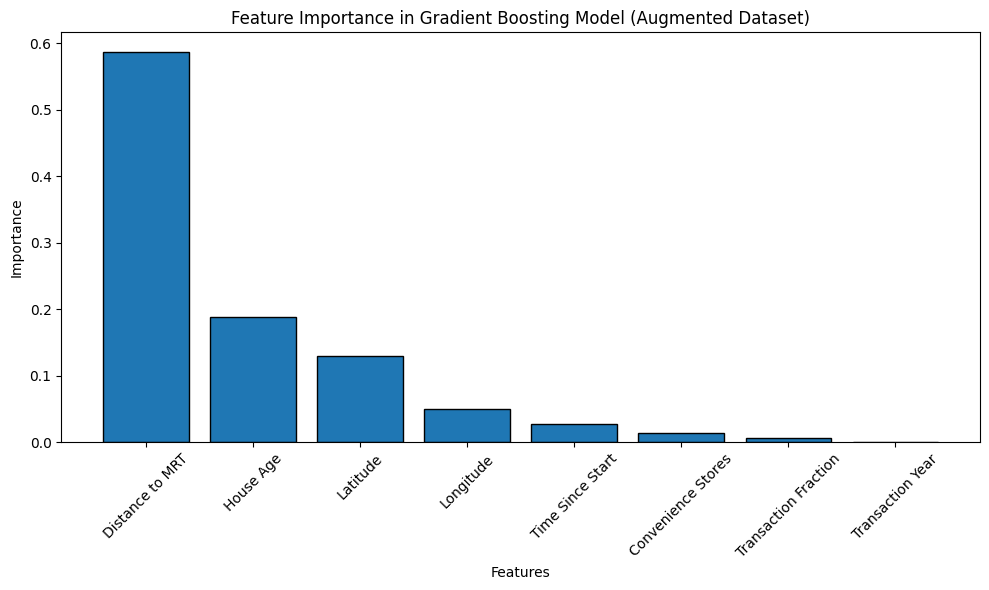

                Feature  Importance
1       Distance to MRT    0.586757
0             House Age    0.188633
3              Latitude    0.128807
4             Longitude    0.050409
7      Time Since Start    0.026785
2    Convenience Stores    0.013166
6  Transaction Fraction    0.005444
5      Transaction Year    0.000000


In [9]:
# Extract feature importances from the Gradient Boosting model
feature_importances = gb_model_updated.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_updated.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], edgecolor='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model (Augmented Dataset)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the importance values
print(importance_df)


Drop "Transaction Year" feature

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Drop 'Transaction Year' from the dataset
X_final_updated = X_updated.drop(columns=['Transaction Year'])

# Split the dataset into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final_updated, y_updated, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model_final_updated = GradientBoostingRegressor(random_state=42, n_estimators=150, learning_rate=0.1, max_depth=3)

# Train the model using the final training data
gb_model_final_updated.fit(X_train_final, y_train_final)

# Predict on the final test data
y_pred_final_updated = gb_model_final_updated.predict(X_test_final)

# Calculate R² score and RMSE for the final Gradient Boosting model
r2_final_updated = r2_score(y_test_final, y_pred_final_updated)
rmse_final_updated = np.sqrt(mean_squared_error(y_test_final, y_pred_final_updated))

# Display results
print(f"R² Score (Accuracy): {r2_final_updated:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_final_updated:.2f}")


R² Score (Accuracy): 0.8209
Root Mean Squared Error (RMSE): 5.48


Feature Importances:
                Feature  Importance
1       Distance to MRT    0.575583
0             House Age    0.192914
3              Latitude    0.128412
4             Longitude    0.054185
6      Time Since Start    0.024738
2    Convenience Stores    0.016580
5  Transaction Fraction    0.007587


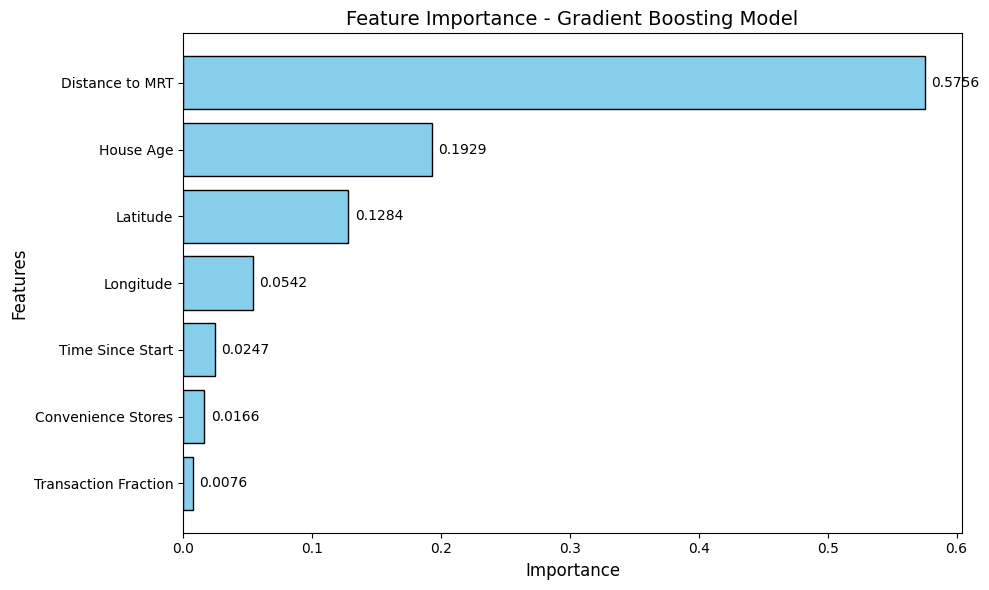

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve feature importances
feature_importances = gb_model_final_updated.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance table
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')

# Add labels to each bar
for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.005, index, f"{value:.4f}", va='center', fontsize=10)

# Plot details
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance - Gradient Boosting Model', fontsize=14)
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()


Visualize Results:

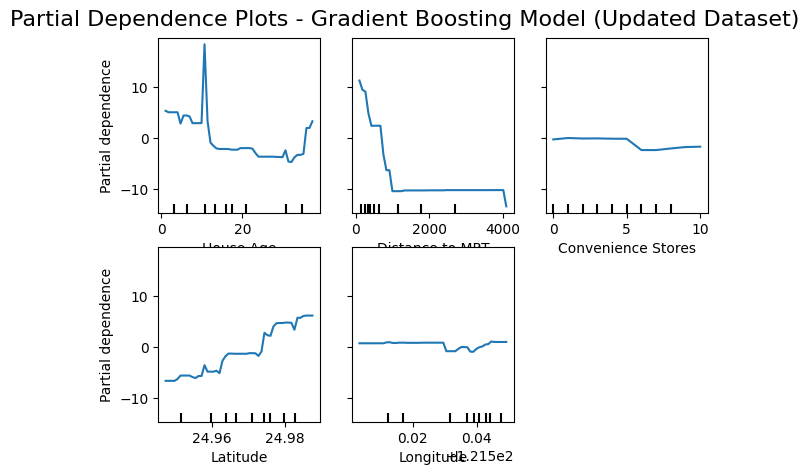

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Visualize Partial Dependence Plots for the Gradient Boosting model with updated variables
features_to_plot = list(X_train_final.columns)[:5]  # Select the first 5 features for visualization

# Create partial dependence plots
PartialDependenceDisplay.from_estimator(
    gb_model_final_updated, X_train_final, features_to_plot, grid_resolution=50
)

# Add a title to the plot
plt.suptitle("Partial Dependence Plots - Gradient Boosting Model (Updated Dataset)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust layout to fit title
plt.show()



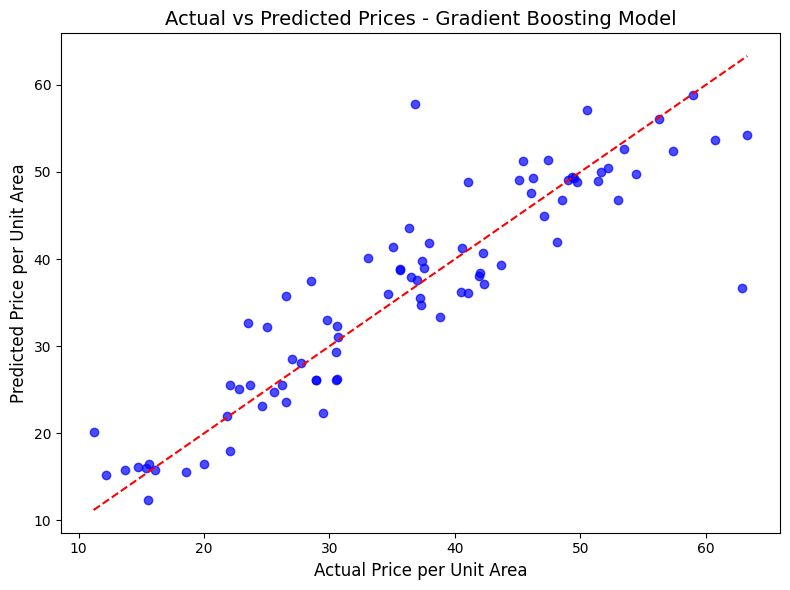

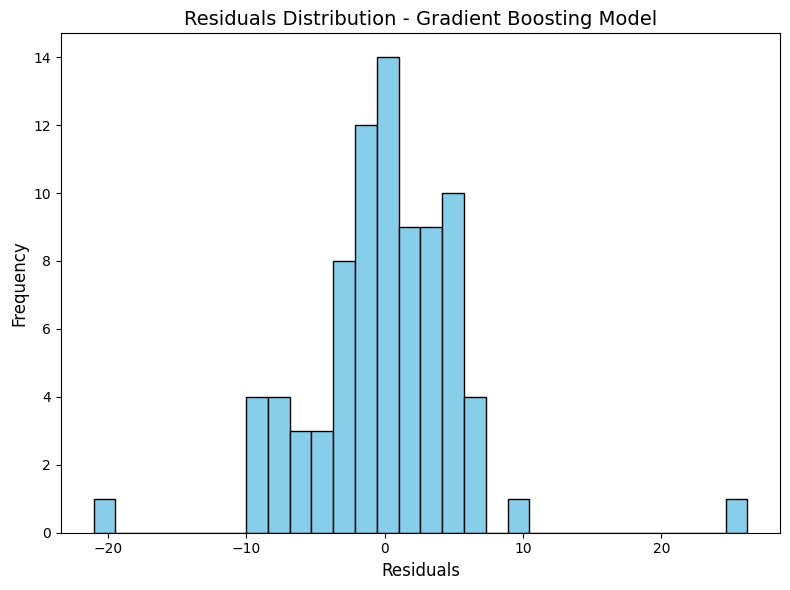

In [ ]:
import matplotlib.pyplot as plt

# Visualize the predicted vs actual results
plt.figure(figsize=(8, 6))
plt.scatter(y_test_final, y_pred_final_updated, alpha=0.7, color='blue')
plt.plot([min(y_test_final), max(y_test_final)], [min(y_test_final), max(y_test_final)], color='red', linestyle='--')
plt.title("Actual vs Predicted Prices - Gradient Boosting Model", fontsize=14)
plt.xlabel("Actual Price per Unit Area", fontsize=12)
plt.ylabel("Predicted Price per Unit Area", fontsize=12)
plt.tight_layout()
plt.show()

# Visualize the residuals
residuals = y_test_final - y_pred_final_updated
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Residuals Distribution - Gradient Boosting Model", fontsize=14)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()
